In [1]:
## Importing necessary Libraries for Data Analysis 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler



# This dataset has been designed as a benchmark for AutoML and predictive modeling in the financial domain. It focuses on assessing credit risk by predicting whether a borrower will experience serious delinquency within two years. The data comprises a mix of financial metrics and personal attributes, which allow users to build and evaluate models for credit risk scoring

In [2]:
## Loading the Dataset for Credirt Risk Analysis
df = pd.read_csv('Credit Risk Benchmark Dataset.csv')
df.head()
df.describe()
df.info()

## Based on our analysis we see that few columns are very skewed and we need to transform them to make them more normal
## rev_utilization is very skewed and we need to transform it
## Late_* is also very skewed and we need to transform it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16714 entries, 0 to 16713
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rev_util     16714 non-null  float64
 1   age          16714 non-null  float64
 2   late_30_59   16714 non-null  float64
 3   debt_ratio   16714 non-null  float64
 4   monthly_inc  16714 non-null  float64
 5   open_credit  16714 non-null  float64
 6   late_90      16714 non-null  float64
 7   real_estate  16714 non-null  float64
 8   late_60_89   16714 non-null  float64
 9   dependents   16714 non-null  float64
 10  dlq_2yrs     16714 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 1.4 MB


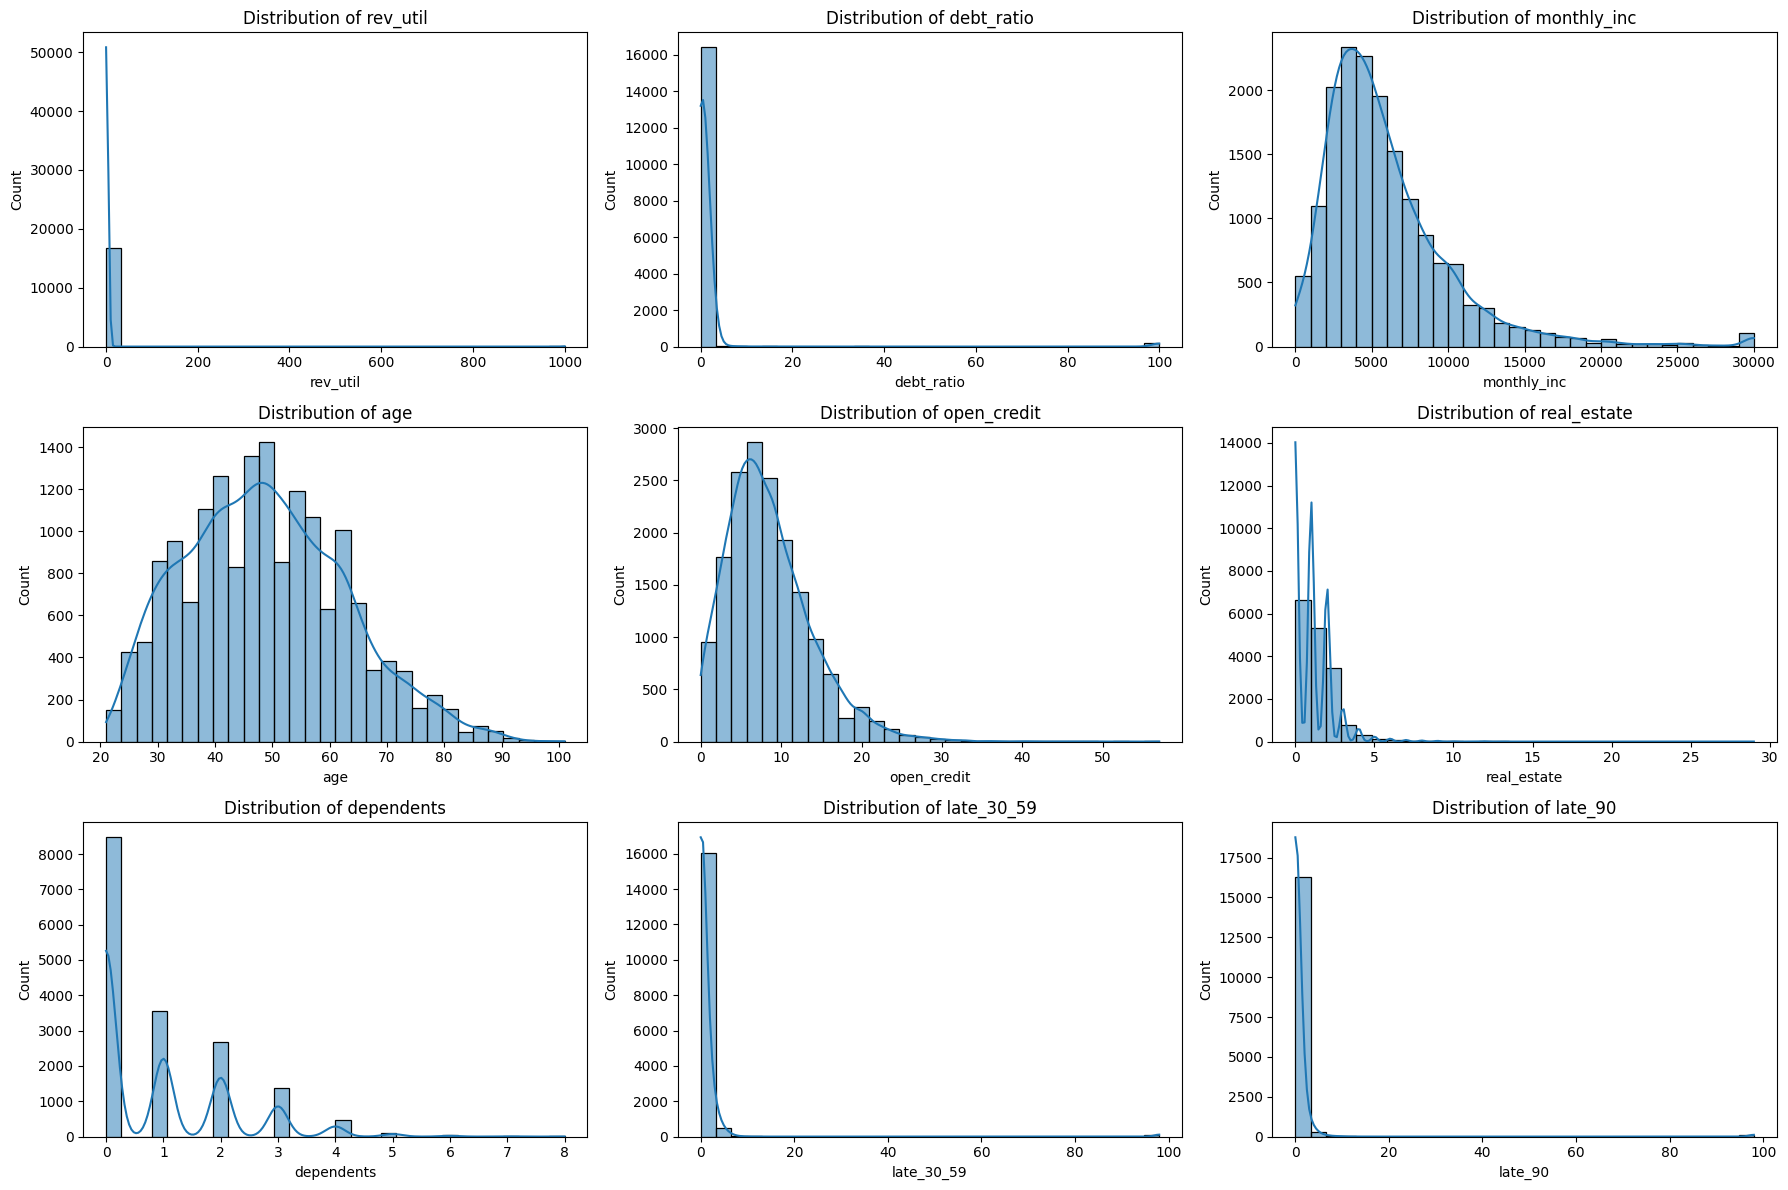

In [3]:
## Pre-processing the data before we start the analysis
## check if there are any missing values
df.isnull().sum()
eda_df = df.copy()
eda_df['rev_util'] = np.where(eda_df['rev_util'] > 1000, 1000, eda_df['rev_util'])
eda_df['debt_ratio'] = np.where(eda_df['debt_ratio'] > 100, 100, eda_df['debt_ratio'])
eda_df['monthly_inc'] = np.where(eda_df['monthly_inc'] > 30000, 30000, eda_df['monthly_inc'])

# Plot distributions
plt.figure(figsize=(18, 12))
cols = ['rev_util', 'debt_ratio', 'monthly_inc', 'age', 'open_credit',
        'real_estate', 'dependents', 'late_30_59', 'late_90']

for i, col in enumerate(cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(eda_df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()




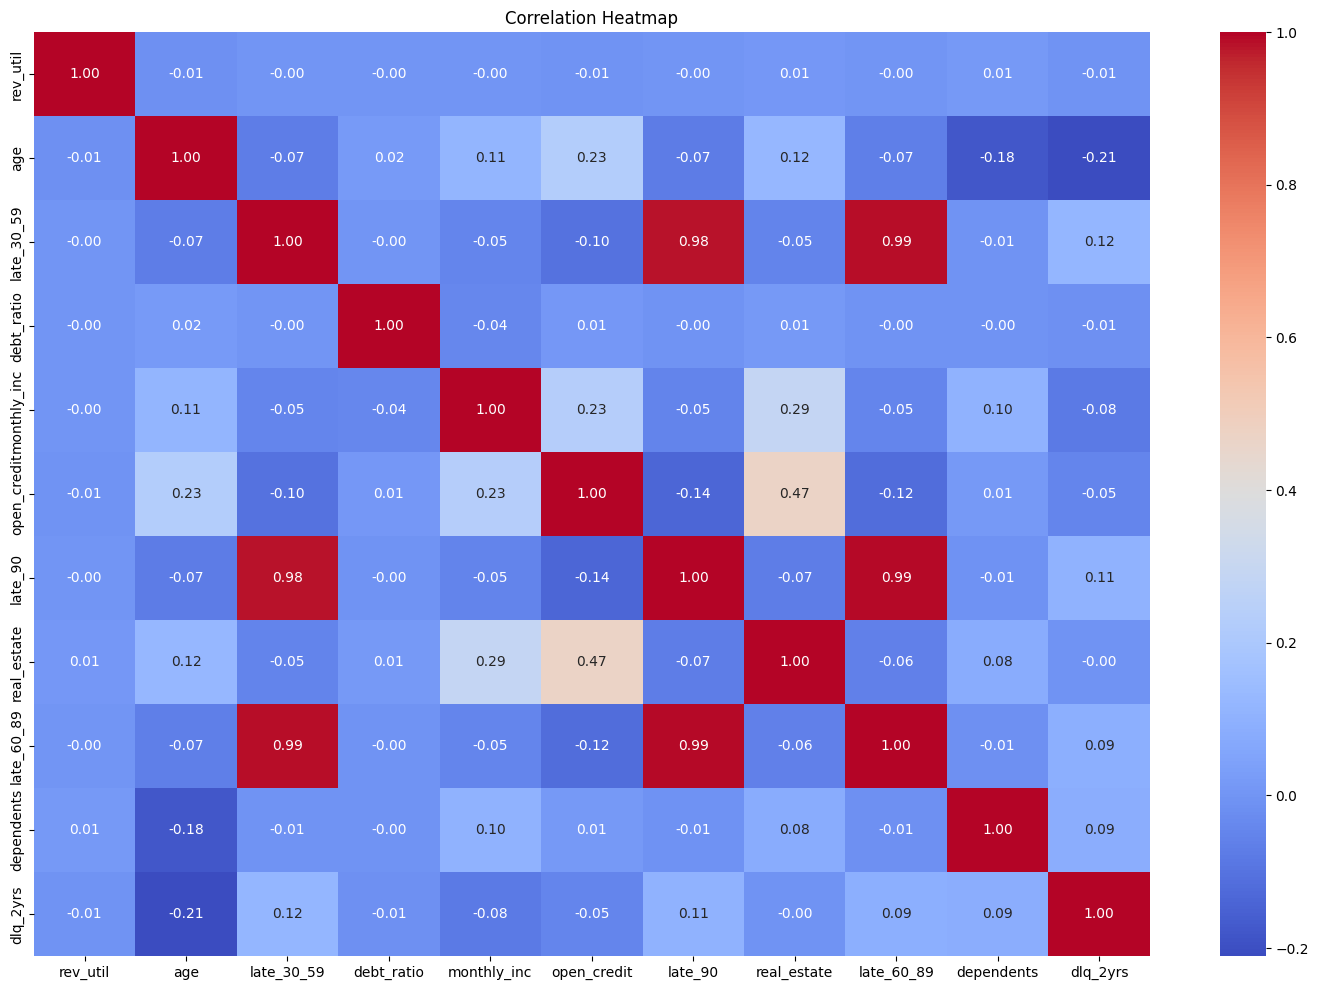

In [4]:
## Correlation Heatmap
plt.figure(figsize=(18, 12))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [5]:
## outlier capping to reduce the effect of outliers and skewness on the data
cap_cols = ['rev_util', 'debt_ratio', 'monthly_inc', 'late_30_59', 'late_60_89', 'late_90']
for col in cap_cols:
    q = df[col].quantile(0.99)
    df[col] = np.where(df[col] > q, q, df[col])

    # Min-Max Scaling (excluding target column)
scaler = MinMaxScaler()
features = [col for col in df.columns if col != 'dlq_2yrs']
df[features] = scaler.fit_transform(df[features])
    

df.head()
df.describe()

,rev_util,age,late_30_59,debt_ratio,monthly_inc,open_credit,late_90,real_estate,late_60_89,dependents,dlq_2yrs
count,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000
mean,0.344549,0.347483,0.102629,0.012303,0.245914,0.149188,0.060897,0.036119,0.057616,0.118045,0.500000
std,0.280775,0.173826,0.193469,0.102151,0.172257,0.094227,0.163305,0.043882,0.162074,0.149849,0.500015
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.056921,0.212500,0.000000,0.000424,0.129459,0.087719,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.306085,0.337500,0.000000,0.000877,0.206902,0.140351,0.000000,0.034483,0.000000,0.000000,0.500000
75%,0.640130,0.462500,0.166667,0.001451,0.313374,0.192982,0.000000,0.068966,0.000000,0.250000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
## Splitting the data into train and test sets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,RocCurveDisplay
X = df.drop('dlq_2yrs', axis=1)
y = df['dlq_2yrs']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
## Model Building

# Initialize and fit the model
model = LogisticRegression()
model.fit(X_train, y_train)
# Predict on test data and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7663775052348191

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.81      0.78      1671
           1       0.79      0.73      0.76      1672

    accuracy                           0.77      3343
   macro avg       0.77      0.77      0.77      3343
weighted avg       0.77      0.77      0.77      3343


Confusion Matrix:
[[1348  323]
 [ 458 1214]]


/Users/rajatdeshpande/ML-projects/mlai/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/rajatdeshpande/ML-projects/mlai/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/rajatdeshpande/ML-projects/mlai/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/rajatdeshpande/ML-projects/mlai/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/rajatdeshpande/ML-projects/mlai/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encountered in matmu

/Users/rajatdeshpande/ML-projects/mlai/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/rajatdeshpande/ML-projects/mlai/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/rajatdeshpande/ML-projects/mlai/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


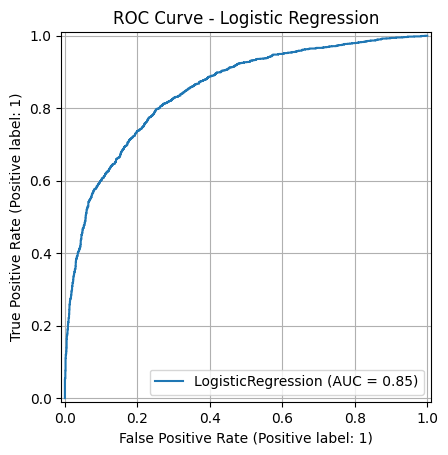

In [11]:
# Plot ROC curve
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("ROC Curve - Logistic Regression")
plt.grid(True)
plt.show()